<a href="https://colab.research.google.com/github/twyeh/university-physics/blob/main/%E7%9E%AC%E6%99%82%E9%80%9F%E5%BA%A6%E5%AF%A6%E9%A9%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# 瞬時速度實驗
## 前言
### 瞬時位置
在運動概念中，物體的位置指的物體當時(瞬時)所在的空間點，如用座標表示，則指其所在的座標點。將這"當時"概念轉換成測量的概念:若在一段時間內(時間間距) $\Delta t$ 物體的位置$x(\Delta t)$。若將測量的時間間距 $\Delta t$，不斷地縮短 (引用極限的概念)
$$
\lim \Delta t \to 0
$$
，則可以得到：
$$
x(t)=\lim_{\Delta t\to 0}x(\Delta t)
$$
對於靜止的物體而言，上述概念明顯成立。
對於運動的物體，如何確定其每一時刻所在的位置？
$$
x(t)=\lim_{\Delta t\to 0}x(\Delta t)=\lim_{\Delta t \to 0}(r(t+\Delta t))
$$
此時 $\Delta t$ 為測量儀器訊號的精確度。

極限概念來自建立一個序列集合
$$
\{x_i, i=1,2,3,\cdots, N\}
$$
當 $N\to \infty$, $x_N\to x$ ,則稱 $x$ 為序列的極限。

### 瞬時速度
在每一時刻物體運動的速度
#### 定義
$$
v(t)=\frac{dx}{dt}=\lim_{\Delta t\to 0}\frac{\Delta x}{\Delta t}
$$
定義平均速度序列
$$
\lim_{\Delta t\to 0}\equiv\lim_{N\to \infty}\{\frac{\Delta x_i}{\Delta t_i}, i=1,2,3,\cdots, N\}
$$
其中 $\Delta t_{i}>\Delta t_{i+1}$
#### 實踐方法
實務上，無法進行無限次數的測量。
為實踐上述的數列極限，進行實驗採集10次數據，利用擬合法找到數列數據的近似規律：
\begin{equation}
f(\Delta t)=A\times \Delta t + B
\end{equation}
當 $\Delta t\to 0$ 時，
\begin{equation}
v(t)=\lim_{\Delta t\to 0}f(\Delta t)=B
\end{equation}

##實驗設計
###目標
進行斜面運動實驗，探索圓球沿斜面自斜面頂端開始自由滾動，當期抵達斜面底端時的瞬時速度。

###步驟


1.   每次皆讓圓球自斜面頂端滾下。
2.   逐次沿斜面移動0.1m，作為測量時間的起點，並以斜面終點為時間測量的終點。
3.   將每次測量的起點至終點的位移記為 $\Delta x_i, i=1,2,3,\cdots$
4.   將每次測量的起點至終點的時距記為 $\Delta t_i, i=1,2,3,\cdots$






In [4]:
delx=[1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]
delt=[1.41,0.97,0.78,0.64,0.52,0.41,0.32,0.23,0.15,0.07]

### 數據分析
計算前述數據中每段測量過程的平均速度。


In [5]:
v_data=[] #平均速度集
for i in np.arange(10): # 逐次計算迴圈
    v_data.append(delx[i]/delt[i]) #計算每次測量的平均速度，並將其加入v_data集中
    print(i,v_data) #列印計算結果進行檢查

0 [0.7092198581560284]
1 [0.7092198581560284, 0.9278350515463918]
2 [0.7092198581560284, 0.9278350515463918, 1.0256410256410258]
3 [0.7092198581560284, 0.9278350515463918, 1.0256410256410258, 1.09375]
4 [0.7092198581560284, 0.9278350515463918, 1.0256410256410258, 1.09375, 1.1538461538461537]
5 [0.7092198581560284, 0.9278350515463918, 1.0256410256410258, 1.09375, 1.1538461538461537, 1.2195121951219512]
6 [0.7092198581560284, 0.9278350515463918, 1.0256410256410258, 1.09375, 1.1538461538461537, 1.2195121951219512, 1.25]
7 [0.7092198581560284, 0.9278350515463918, 1.0256410256410258, 1.09375, 1.1538461538461537, 1.2195121951219512, 1.25, 1.3043478260869563]
8 [0.7092198581560284, 0.9278350515463918, 1.0256410256410258, 1.09375, 1.1538461538461537, 1.2195121951219512, 1.25, 1.3043478260869563, 1.3333333333333335]
9 [0.7092198581560284, 0.9278350515463918, 1.0256410256410258, 1.09375, 1.1538461538461537, 1.2195121951219512, 1.25, 1.3043478260869563, 1.3333333333333335, 1.4285714285714286]


### 繪製數據圖
繪製平均速度與時距數的關係圖，已發現其規律。

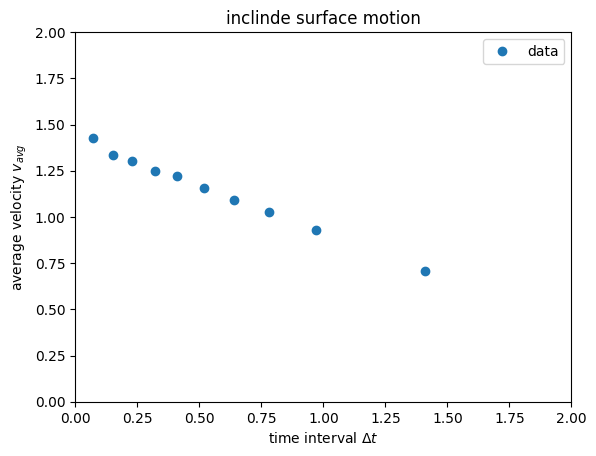

In [11]:
xdata = np.asarray(delt)
ydata = np.asarray(v_data)
#xerror = np.asarray(t_noise)
#plt.errorbar(xdata, ydata, yerr=0, xerr=xerror, fmt='none')
plt.plot(xdata, ydata, 'o', label='data')
plt.xlim(0, 2.0)
plt.ylim(0, 2.0)
plt.legend()
plt.xlabel('time interval $\Delta t$')
plt.ylabel('average velocity $v_{avg}$')
plt.title('inclinde surface motion')
plt.show()

### 模型
從上述圖形，可以觀察到平均速度與時距呈現線性關係。
定義下列線性型模型
\begin{equation}
f(\Delta t)=A\times \Delta t + B
\end{equation}

In [7]:
# Define the Model function
def Model(x, A, B):
    return  A*x+B

### 擬合分析
利用 scipy 的 optimize 類中的curve_fit(模型，實驗自變數數據，實驗應變樹數據)
### 擬合結果
v_parm：儲存模型中(A, B)參數的擬合結果
v_covar：儲存擬合模型根據擬合參數 (A,B)的計算結果與實驗應變數據之間的誤差：([$\rho_{AA}, \rho_{AB}$],[$\rho_{BA}, \rho_{BB}$])。總擬合誤差 $\sigma=\sqrt{\rho_{AA}^2}+\rho_{BB}^2$

In [8]:
v_param, v_covar = curve_fit(Model, xdata, ydata)
print(v_param)
print(v_covar)

[-0.51537797  1.42806357]
[[ 1.59534698e-04 -8.77440840e-05]
 [-8.77440840e-05  7.28786405e-05]]


根據前述擬合分析，得到下列擬合函數 $f(\Delta t)$
$$
f(\Delta t)=-0.52*(\Delta t) +1.43
$$
取極限 $\Delta t\to 0$
$$
v(t=1.41\,\text{s})=\lim_{\Delta t \to 0}f(\Delta t)=1.43\, \text{m/s}
$$
得到圓球在時刻 $t=1.41\,\text{s}$時的瞬時速度為$1.43\,\text{m/s}$。

###模型與數據比較
繪製擬合模型與實驗數據圖進行比較

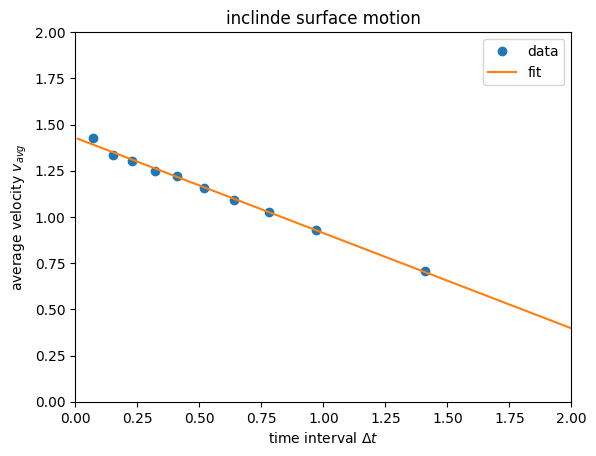

In [12]:
t = np.linspace(0.01, 2, 100)
fit_v = Model(t, *v_param)
plt.plot(xdata, ydata, 'o', label='data')
plt.plot(t, fit_v, '-', label='fit')
plt.xlim(0, 2.0)
plt.ylim(0, 2.0)
plt.legend()
plt.xlabel('time interval $\Delta t$')
plt.ylabel('average velocity $v_{avg}$')
plt.title('inclinde surface motion')
plt.show()

##結論


1.   設計斜面運動實驗探討斜面底端的瞬時速度
2.   建立平均速度相對於時距的序列集合以建構極限的操作型程序
3.   由於實驗限制，無法建構無窮序列集合，需要透過擬合方法以找出序列集合的近似規律
4.   透過擬合結果計算序列集合在 $\Delta t \to 0$ 的極限



